# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 12})
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
#%load_ext autoreload
#%autoreload 2

# local modules
import modelproject2 as ip

# Model description

**Descriping the model:**

We consider a version of the Ramsey model with population growing at rate $1+n$.


**Households maximize** the intertemporal utility function:

$$
\begin{aligned}
U =& \max_{c_{t}}\sum_{t=0}^{\infty}\beta^{t}(1+n)^{t}\frac{c_{t}^{1-\theta}}{1-\theta}\\
 & \text{s.t.}\\
 & a_{t+1}(1+n)=a_tR_t+w_t-c_t
\end{aligned}
$$
where $c_t$ is consumption per capita, $\beta$ is the discount rate, $\theta$ is the coefficient of relative risk aversion and $a_t$ .
with $a_0>0$ given and $R_t=1+r_t-\delta$ implies that return on household savings ($R_t$) must equal the rental rate on capital paid by firms ($r_t$) plus the undepreciated capital ($1-\delta$)
It is assumed $\beta(1+n)<1$ and $\theta>0$



The Lagrangian of the representative household's optimization problem is:
$$
\begin{equation*}
L=\sum_{t=0}^{\infty}\beta^{t}(1+n)^{t}\left[\frac{c_{t}^{1-\theta}}{1-\theta}-\mu_t\left(a_{t+1}(1+n)-(1+r_t-\delta)a_t-w_t+c_t\right)\right]
\end{equation*}
$$
where $\mu_t=\frac{\lambda_t}{\beta^t(1+n)^t}$

The FOC's are:
$$
\begin{aligned}
\frac{\partial L}{\partial c_t}=0 &\Leftrightarrow \mu_t=c_t^{-\theta} \\
\frac{\partial L}{\partial a_{t+1}}=0 &\Leftrightarrow \beta \mu_{t+1}(1+r_{t+1}-\delta)
\end{aligned}
$$

Which combined yields the Euler equation, describing the households optimal consumption path:
$$
\begin{equation*}
c_t^{-\theta}=\beta c_{t+1}^{-\theta}(1+r_{t+1}-\delta) \Leftrightarrow \frac{c_{t+1} }{c_t} = \left(\beta(1+r_{t+1}-\delta)\right)^{\frac{1}{\theta}}
\end{equation*}
$$
where $\frac{1}{\theta}$ is the elasticity of substitution, which is a measure of how willing the household is to substitute a unit of consumption today for a unit of consumption tomorrow.

**Identical competitive firms maximize** the profit function:

$$
\begin{equation*}
\pi^F(K_t,L_t)=A K_t^{\alpha}(L_t)^{1-\alpha}-w_tL_t-r_tK_t
\end{equation*}
$$

where $L_t$ is labor, $K_t$ is capital, $w_t$ is the wage rate, $r_t$ is the rental rate.

Profit maximization yields:
$$
\begin{aligned}
r_t =& A\alpha k_t^{\alpha-1} \\
w_t =& A(1-\alpha) k_t^{\alpha}
\end{aligned}
$$
where $k_t=\frac{K_t}{L_t}$ is capital per capita.


Furthermore, the goods market clearing condition is:
$$
Y_t=c_t+I_t
$$
where $Y_t=F(K_t,L_t)$

And capital follows the law of motion:
$$
K_t=(1-\delta)K_{t-1}+I_t
$$


**Solution Algorithm:**

We define a function $H_t$ for the transition paths of the economy:
$$
\begin{aligned}
H_{t}
=\left[\begin{array}{c}
c_t^{-\theta}-\beta c_{t+1}^{-\theta}(1+r_{t+1}-\delta)\\
K_{t}-[(1-\delta-n)K_{t-1}+Y_t-c_{t}]
\end{array}\right]
\quad \text{where } t\in (0,\infty)
\end{aligned}
$$  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

In [2]:
from modelproject2 import RamseyModel

In [3]:
model = RamseyModel()

model.initialmodel() # initilizaing
model.setup()
model.allocate()

par = model.par
ss = model.ss
path = model.path

In [4]:
model.steady_state(KY_ss=4.0)

Y_ss = 1.0000
K_ss/Y_ss = 4.0000
r_ss = 0.0750
w_ss = 0.7000
beta = 0.9302
A = 0.6598


In [5]:
# a. sAet initial value
par.K_initial = ss.K

# b. set path
path.A[:] = ss.A
path.C[:] = ss.C
path.K[:] = ss.K

# c. check errors
errors_ss = model.evaluate_path_errors()
assert np.allclose(errors_ss, 0.0)

In [6]:
model.calculate_jacobian()

In [7]:
par.K_initial = 0.50*ss.K # start away from steady state
model.solve() # find transition path

 it =   0 -> max. abs. error =   2.08774760
 it =   1 -> max. abs. error =   0.03420823
 it =   2 -> max. abs. error =   0.03836482
 it =   3 -> max. abs. error =   0.00473137
 it =   4 -> max. abs. error =   0.01201268
 it =   5 -> max. abs. error =   0.01057479
 it =   6 -> max. abs. error =   0.00363710
 it =   7 -> max. abs. error =   0.00162228
 it =   8 -> max. abs. error =   0.00093142
 it =   9 -> max. abs. error =   0.00007259
 it =  10 -> max. abs. error =   0.00009313
 it =  11 -> max. abs. error =   0.00000426
 it =  12 -> max. abs. error =   0.00000598
 it =  13 -> max. abs. error =   0.00000036
 it =  14 -> max. abs. error =   0.00000030
 it =  15 -> max. abs. error =   0.00000002
 it =  16 -> max. abs. error =   0.00000001
 it =  17 -> max. abs. error =   0.00000000


# Further analysis

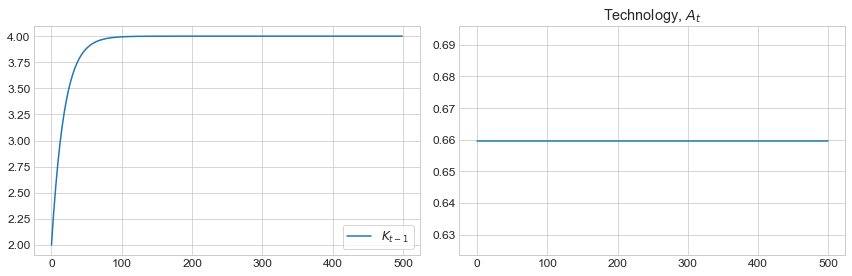

In [8]:
fig = plt.figure(figsize=(2*6,6/1.5))
ax = fig.add_subplot(1,2,1)
ax.plot(path.K_lag,label=r'$K_{t-1}$')
ax.legend(frameon=True)

ax = fig.add_subplot(1,2,2)
ax.plot(path.A)
ax.set_title('Technology, $A_t$')

fig.tight_layout()

In [9]:
par.K_initial = ss.K # start from steady state
path.A[:] = 0.95**np.arange(par.transition_path)*0.2*ss.A + ss.A # shock path


In [10]:
model.solve()


 it =   0 -> max. abs. error =   0.20000000
 it =   1 -> max. abs. error =   0.00380399
 it =   2 -> max. abs. error =   0.00030123
 it =   3 -> max. abs. error =   0.00002909
 it =   4 -> max. abs. error =   0.00000863
 it =   5 -> max. abs. error =   0.00000214
 it =   6 -> max. abs. error =   0.00000041
 it =   7 -> max. abs. error =   0.00000003
 it =   8 -> max. abs. error =   0.00000001


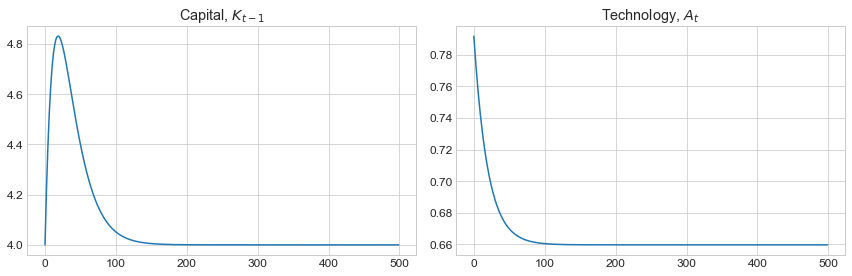

In [11]:
fig = plt.figure(figsize=(2*6,6/1.5))

ax = fig.add_subplot(1,2,1)
ax.set_title('Capital, $K_{t-1}$')
ax.plot(path.K_lag)

ax = fig.add_subplot(1,2,2)
ax.plot(path.A)
ax.set_title('Technology, $A_t$')

fig.tight_layout()

 it =   0 -> max. abs. error =   0.10000000
 it =   1 -> max. abs. error =   0.00277771
 it =   2 -> max. abs. error =   0.00015871
 it =   3 -> max. abs. error =   0.00000239
 it =   4 -> max. abs. error =   0.00000026
 it =   5 -> max. abs. error =   0.00000002
 it =   6 -> max. abs. error =   0.00000000


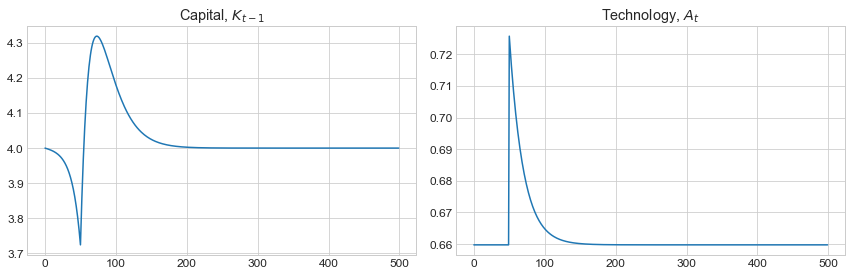

In [12]:
par.K_lag_ini = ss.K # start from steady state

# shock
H = 50
path.A[:] = ss.A
path.A[H:] = 0.95**np.arange(par.transition_path-H)*0.1*ss.A + ss.A

model.solve()

fig = plt.figure(figsize=(2*6,6/1.5))

ax = fig.add_subplot(1,2,1)
ax.set_title('Capital, $K_{t-1}$')
ax.plot(path.K_lag)

ax = fig.add_subplot(1,2,2)
ax.plot(path.A)
ax.set_title('Technology, $A_t$')

fig.tight_layout()

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 